<a href="https://colab.research.google.com/github/mannirulz/BotDAD/blob/master/ML/BotDAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Copyright (C) 2016   Manmeet Singh, Maninder Singh, Sanmeet kour
# email : manmeetsingh@thapar.edu
# Permission to use, copy, modify, and distribute this software and its
# documentation for any purpose with or without fee is hereby granted,
# provided that the above copyright notice and this permission notice
# appear in all copies.
#
# THE SOFTWARE IS PROVIDED "AS IS" AND AUTHOR DISCLAIMS ALL WARRANTIES
# WITH REGARD TO THIS SOFTWARE INCLUDING ALL IMPLIED WARRANTIES OF
# MERCHANTABILITY AND FITNESS. IN NO EVENT SHALL AUTHOR BE LIABLE FOR
# ANY SPECIAL, DIRECT, INDIRECT, OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES
# WHATSOEVER RESULTING FROM LOSS OF USE, DATA OR PROFITS, WHETHER IN AN
# ACTION OF CONTRACT, NEGLIGENCE OR OTHER TORTIOUS ACTION, ARISING OUT
# OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF THIS SOFTWARE.
#
# BotDAD Machine Learning Module


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.ensemble import RandomForestClassifier
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.lines as mlines


class BotDAD:
  
  def __init__(self):
    self.df = ""
  
  
  def copy_file(self):
    #!pip install -U -q PyDrive
    # 1. Authenticate and create the PyDrive client.
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)

    # 2. Load a file by ID and create local file.
    downloaded = drive.CreateFile({'id':'1Rrv6tMODoXU9cy3Fi1hXbj8A2wfv1_pz'}) # replace fileid with Id of file you want to access
    downloaded.GetContentFile('export.csv') # now you can use export.csv 
  
  def import_db(self):
    
    
    self.copy_file()
    #from imblearn.over_sampling import SMOTE 

    sns.set_style("ticks")
    plt.style.use("seaborn-poster")

    %matplotlib inline
    #Load Dataset
    self.df = pd.read_csv("export.csv",low_memory=False)
    print("There are %s observations and %s columns in the dataset" % self.df.shape)
    #print(df.head())
    
    
  def encode_values(self):
    self.y = self.df.Result.str.strip()

    #print(y[:5])

    
    self.labelencoder_y = LabelEncoder()

    self.y = self.labelencoder_y.fit_transform(self.y)

    #print("Classes: ", labelencoder_y.classes_)
    #print("\nFirst five values of y:")
    #print(df.Result[:5])
    #print("\nFirst five encoded values of y", y[:5])
    
    
  def display_count(self):
    #optional
    clean = 0
    Bot = 0
    for row_index,row in self.df.iterrows():
        if ((row.Result.strip()) == 'Clean'):
            clean=clean+1
        else :
            #print (row)
            Bot= Bot +1
    print(clean,Bot)
    
    
    
  # source: Scikit-learn Documentation

  def plot_confusion_matrix(self,cm, classes,
                            normalize=False,
                            title='Confusion matrix',
                            cmap=plt.cm.Blues):
      """
      This function prints and plots the confusion matrix.
      Normalization can be applied by setting `normalize=True`.
      """
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
      plt.title(title)
      tick_marks = np.arange(len(classes))
      plt.xticks(tick_marks, classes, rotation=0)
      plt.yticks(tick_marks, classes)

      if normalize:
          cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
          print("Normalized confusion matrix")
      else:
          print('Confusion matrix, without normalization')

      print(cm)

      thresh = cm.max() / 2.
      for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, cm[i, j], fontsize=20,
                   horizontalalignment="center",
                   color="white" if cm[i, j] > thresh else "black")

      plt.tight_layout()
      plt.ylabel('Actual')
      plt.xlabel('Predicted')
      
  def split_data(self):
    self.df.Result.unique()

    self.x = self.df[self.df.columns.difference(['Result'])].values


    print("Shape of X: ", self.x.shape)
    print("Shape of y: ", self.y.shape)


    #sm = SMOTE(random_state=42)


    #x_bal, y_bal = sm.fit_sample(x, y)

    from sklearn.model_selection import train_test_split
    #x_train, x_test, y_train, y_test = train_test_split(x_bal, y_bal, test_size = 0.3, random_state = 42)
    self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.x, self.y, test_size = 0.3, random_state = 42)

    #print(x[:5])
    #print(y[:5])
      
      
      
      
  def create_forest(self):
    # Random forest

    

    self.rf_classifier = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
    self.rf_classifier.fit(self.x_train, self.y_train)

    print(self.rf_classifier.score(self.x_train, self.y_train))

    print(self.rf_classifier.score(self.x_test, self.y_test))



  def show_feature_imp(self):
    self.param_array = [
    ['P1' ,'Nbr. of DNS requests per hour ',7500],
    ['P2' ,'Nbr. of Distinct DNS requests ',1500],
    ['P3' ,'Highest Nbr. of requests(single domain)',1000],
    ['P4' ,'Average Nbr. of requests ',300],
    ['P5' ,'Highest Nbr. of requests ',500],
    ['P6' ,'Nbr. of MX Record Queries ',10],
    ['P7' ,'Nbr. of PTR Record Queries ',500],
    ['P8' ,'Nbr. of Distinct DNS Servers ',5],
    ['P9' ,'Nbr. of Distinct TLD  Queried ',25],
    ['P10' ,'Nbr. of Distinct SLD  Queried ',500],
    ['P11' ,'Uniqueness ratio ',500],
    ['P12' ,'Nbr. of Failed Queries',12],
    ['P13' ,'Nbr. of Distinct Cities',70],
    ['P14' ,'Nbr. of Distinct Countries ',30],
    ['P15' ,'Flux ratio per hour ',100]]


    self.importances = self.rf_classifier.feature_importances_
    std = np.std([self.rf_classifier.feature_importances_ for tree in self.rf_classifier.estimators_],
                 axis=0)
    indices = np.argsort(self.importances)[::-1]

    # Print the feature ranking
    print("Rank | Feature | Importance")

    for f in range(self.x.shape[1]):
        print("%2d. %-40s %5s (%f)" % (f + 1, self.param_array[indices[f]][1] , "(P" + str ( indices[f]+1) + ")", self.importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(self.x.shape[1]), self.importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(self.x.shape[1]), indices)
    plt.xlim([-1, self.x.shape[1]])
    plt.ylabel('Percent')
    plt.xlabel('Parameter index')

    plt.show()



  def plot_baseline(self):
    # Baseline Model
    # Predictions on Train and Test
    y_pred_train = np.ones_like(self.y_train)
    y_pred_test = np.ones_like(self.y_test)
    self.cm = confusion_matrix(y_true=self.y_train, y_pred=y_pred_train)
    #print(cm)
    #self.plot_confusion_matrix(self.cm, self.labelencoder_y.classes_)
    #print(y_train[:5])
    #print(y_pred_train[:5])



  def plot_predicted_model(self):
    # Predicted Model

    self.y_pred  = self.rf_classifier.predict(self.x_test)
    self.cm = confusion_matrix(y_true=self.y_test, y_pred=self.y_pred)
    #self.plot_confusion_matrix(self.cm, self.labelencoder_y.classes_)
    #TN = 73785
    #FN = 294
    #TP = 73977
    #FP = 27
    TN, FP, FN, TP = confusion_matrix(y_true=self.y_test, y_pred=self.y_pred).ravel()

    print("Sensitivity: ", TP/(TP+FN))
    print("Specificity: ", TN/(TN+FP))

    correct_predictions = TN+TP
    total_predictions = TN+FN+TP+FP
    accuracy = correct_predictions/total_predictions
    print("Accuracy: ", accuracy)

    from sklearn.metrics import accuracy_score

    print("Accuracy: ", accuracy_score(self.y_test, self.y_pred))


  def plot_grid_search(self):
    self.forest = RandomForestClassifier(random_state=1)
    self.param_grid = {
        'n_estimators': [5, 10],
        'max_depth': [3, None],
        'max_features': [1, 3, 5],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [2, 5],
        'bootstrap': [True, False],
        'criterion': ['gini', 'entropy']
    }

    self.grid = GridSearchCV(estimator=self.forest, param_grid=self.param_grid, cv=2)
    self.grid.fit(self.x_train, self.y_train)
    print (self.grid.best_estimator_)
    print ("\nBest Score: ", self.grid.best_score_)

    self.grid.score(self.x_test, self.y_test)

    #self.cm = confusion_matrix(self.y_train, self.grid.predict(self.x_train))
    #self.plot_confusion_matrix(self.cm, classes=["B", "M"], title="Confusion Matrix (Train)")

    #self.cm = confusion_matrix(self.y_test, self.grid.predict(self.x_test))
    #self.plot_confusion_matrix(self.cm, classes=["B", "M"], title="Confusion Matrix (Test)")



  def plot_results(self, model, param = 'max_depth', name = 'Num Trees'):
      param_name = 'param_%s' % param

      # Extract information from the cross validation model
      train_scores = model.cv_results_['mean_train_score']
      test_scores = model.cv_results_['mean_test_score']
      train_time = model.cv_results_['mean_fit_time']
      param_values = list(model.cv_results_[param_name])

      # Plot the scores over the parameter
      plt.subplots(1, 2, figsize=(15, 6))
      plt.subplot(121)
      plt.plot(param_values, train_scores, 'bo-', label = 'train')
      plt.plot(param_values, test_scores, 'go-', label = 'test')
      plt.ylim(ymin = 0.96, ymax = 1.0)
      #plt.ylim(ymin = 0.990, ymax = 1.0)
      plt.legend()
      plt.xlabel(name)
      plt.ylabel('Accuracy')
      plt.title('Accuracy vs %s' % name)

      plt.subplot(122)
      plt.plot(param_values, train_time, 'ro-')
      plt.ylim(ymin = 0.0, ymax = 60.0)
      plt.xlabel(name)
      plt.ylabel('Train Time (sec)')
      plt.title('Training Time vs %s' % name)


      plt.tight_layout(pad = 4)



  def plot_GS_Acc_vs_Max_Feature(self):
    # Define a grid over only the maximum number of features
    self.feature_grid = {'max_features': list(range(1, self.x_train.shape[1] + 1))}
    #feature_grid = {'max_features': list(range(1, 15))}

    # Create the grid search and fit on the training data
    self.feature_grid_search = GridSearchCV(self.rf_classifier, param_grid=self.feature_grid, cv = 3, n_jobs=-1, verbose= 2,
                                      scoring = 'accuracy',return_train_score=True)
    self.feature_grid_search.fit(self.x_train, self.y_train);


    self.plot_results(self.feature_grid_search, param='max_features', name = 'Max Features')


  def plot_GS_Acc_vs_estimators(self):
    # Define a grid over only the maximum number of features
    self.feature_grid = {'n_estimators': [1,3,5,7,10,12,15]}
    #feature_grid = {'max_features': list(range(1, 15))}

    # Create the grid search and fit on the training data
    self.feature_grid_search = GridSearchCV(self.rf_classifier, param_grid=self.feature_grid, cv = 3, n_jobs=-1, verbose= 2,
                                      scoring = 'accuracy',return_train_score=True)
    self.feature_grid_search.fit(self.x_train, self.y_train);


    self.plot_results(self.feature_grid_search, param='n_estimators', name = 'Nbr. of Estimators')


  def plot_GS_Acc_vs_depth(self):
    # Define a grid over only the maximum number of features
    self.feature_grid = {'max_depth': [2,3,5,7,9,11,13,15]}
    #feature_grid = {'max_features': list(range(1, 15))}

    # Create the grid search and fit on the training data
    self.feature_grid_search = GridSearchCV(self.rf_classifier, param_grid=self.feature_grid, cv = 3, n_jobs=-1, verbose= 2,
                                      scoring = 'accuracy',return_train_score=True)
    self.feature_grid_search.fit(self.x_train, self.y_train);


    self.plot_results(self.feature_grid_search, param='max_depth', name = 'Max Depth')





  def plot_GS_Acc_vs_Criterian(self):
    # Define a grid over only the maximum number of features
    self.feature_grid = {'criterion': ['gini', 'entropy']}
    #feature_grid = {'max_features': list(range(1, 15))}

    # Create the grid search and fit on the training data
    self.feature_grid_search = GridSearchCV(self.rf_classifier, param_grid=self.feature_grid, cv = 3, n_jobs=-1, verbose= 2,
                                      scoring = 'accuracy',return_train_score=True)
    self.feature_grid_search.fit(self.x_train, self.y_train);

    # scoring = ['accuracy', 'precision'] 

    self.plot_results(self.feature_grid_search, param='criterion', name = 'Criterion')
    
    
  def feature_plot_array(self,x,i,threshold):
    
    #fig, ax = plt.subplots()
    
    
    #plt.subplot(8,2,i+1)
    
    base = np.arange(len(x))
    plt.grid(True)
    
    
    cmap = LinearSegmentedColormap.from_list('custom blue', 
                                             [(0,    '#ff0000'),
                                              (1,    '#00ff00')], N=256)
   
    
    
    #plt.plot(base, x, c='blue')
    plt.scatter(base, x, c=self.feature_y,  cmap=cmap,marker='.')
    #plt.title( param_array[i][0] + " - " + param_array[i][1] )
    plt.title( self.feature_param_array[i][1]  )
    
    #plot threshold
    plt.axhline(y=threshold, color='blue')
    
    #legend
    blue_plus = mlines.Line2D([], [], color='#00ff00', marker='.', linestyle='None',
                          markersize=10, label='Clean Host')
    purple_plus = mlines.Line2D([], [], color='#ff0000', marker='.', linestyle='None',
                          markersize=10, label='Infected Host')
    threshold_plus = mlines.Line2D([0, 1], [0, 1], color='blue', marker='_', linestyle='solid',
                          markersize=10, label='Threshold')

    plt.legend(loc='upper left',handles=[blue_plus, purple_plus,threshold_plus], shadow=True, fontsize  ='large' ,
               fancybox =True, frameon=True )
   
    
     
    
    #labels
    plt.xlabel('DNS fingerprint Index')
    #plt.ylabel(param_array[i][1])
    plt.xlim([0, len(x)-1])
    plt.show()
  
    
    
    
  def feature_plot(self):
    
    self.feature_x=self.df.loc[:, 'P1':'P15'].values

    self.feature_y = self.df.Result.str.strip()

    #print(y[:5])

    from sklearn.preprocessing import LabelEncoder, OneHotEncoder
    labelencoder_y = LabelEncoder()

    self.feature_y = self.labelencoder_y.fit_transform(self.feature_y)
    self.feature_y
    
    self.feature_param_array = [
    ['P1' ,'No. of DNS requests per hour ',7500],
    ['P2' ,'No. of Distinct DNS requests ',1500],
    ['P3' ,'Highest No. of requests(single domain)',1000],
    ['P4' ,'Average No. of requests ',300],
    ['P5' ,'Highest No. of requests ',500],
    ['P6' ,'No. of MX Record Queries ',10],
    ['P7' ,'No. of PTR Record Queries ',500],
    ['P8' ,'No. of Distinct DNS Servers ',5],
    ['P9' ,'No. of Distinct TLD  Queried ',25],
    ['P10' ,'No. of Distinct SLD  Queried ',500],
    ['P11' ,'Uniqueness ratio ',500],
    ['P12' ,'No. of Failed Queries',12],
    ['P13' ,'No. of Distinct Cities',70],
    ['P14' ,'No. of Distinct Countries ',30],
    ['P15' ,'Flux ratio per hour ',100]]
    
    print("Max    |     Min     |        Average")
    for i in np.arange(15):
      print(str(max(self.feature_x[:,i]))+ "\t" + str(min(self.feature_x[:,i])) + "\t" + str(np.mean(self.feature_x[:,i])))
      
    #plt.subplot(2,2,1)
    fig = plt.gcf()
    fig.set_size_inches(5,4)
    #plt.subplots_adjust(left=0.52, bottom=0.08, right=0.85, top=0.92, wspace=0.01, hspace=0.08)

    for i in np.arange(15):
        self.feature_plot_array(self.feature_x[:,i],i,self.feature_param_array[i][2])
    
    
    #plt.show

There are 252741 observations and 16 columns in the dataset
246804 5937
Shape of X:  (252741, 15)
Shape of y:  (252741,)
Max    |     Min     |        Average
53000.0	100.0	272.74708891711276
4918.0	1.0	97.28485287309934
52500.0	1.0	40.37690362861586
4053.0	0.0	6.778682524798113
8580.0	3.0	42.17913199678723
66.0	0.0	0.011304062261366378
5462.0	0.0	1.982488001550995
42.0	1.0	1.0157987821524803
185.0	1.0	6.345408936421079
2213.0	1.0	41.76024863397708
4022.0	0.0	0.27138545383388923
174.0	0.0	0.0073237029211722674
188.0	0.0	2.6012914406447707
52.0	0.0	1.3905025302582485
126.8571429	0.0	0.0464393458607626


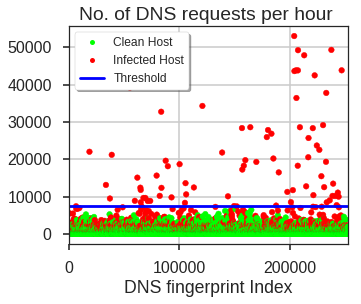

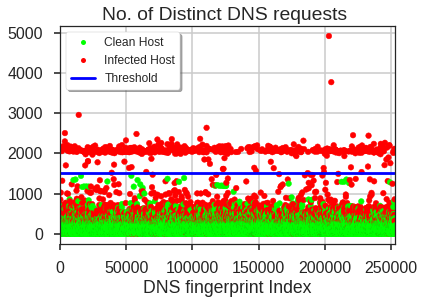

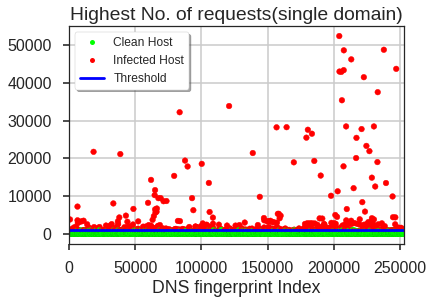

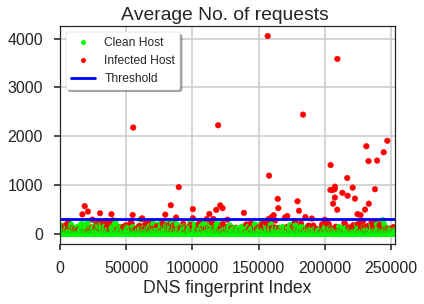

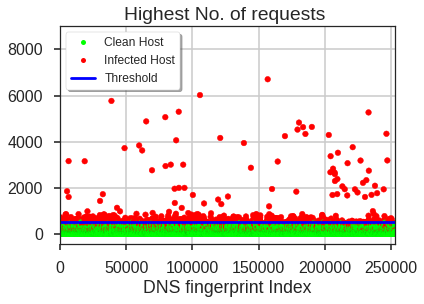

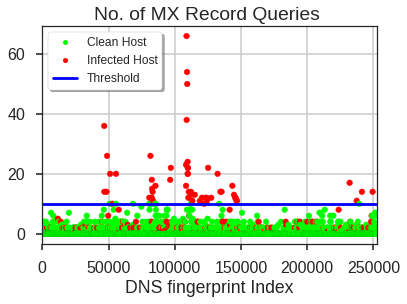

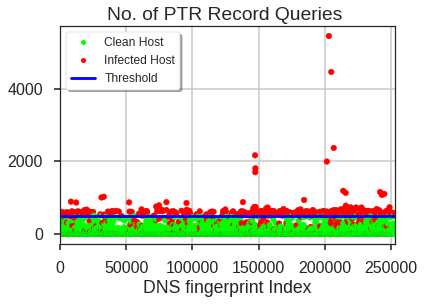

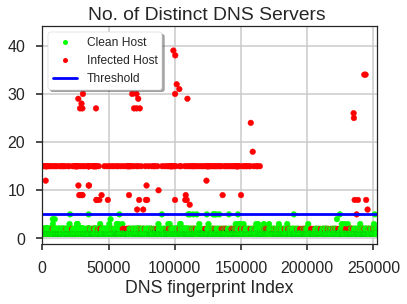

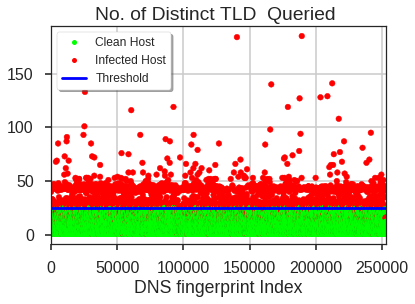

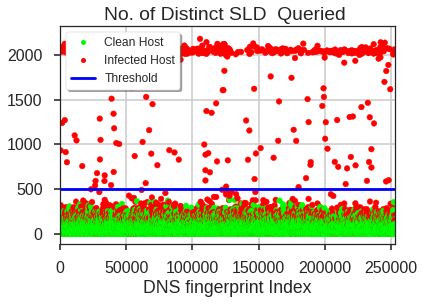

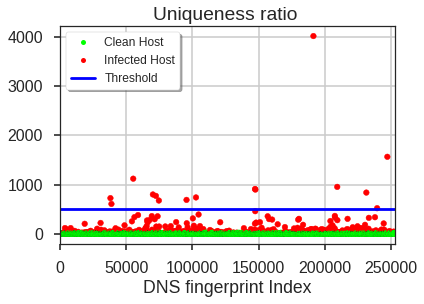

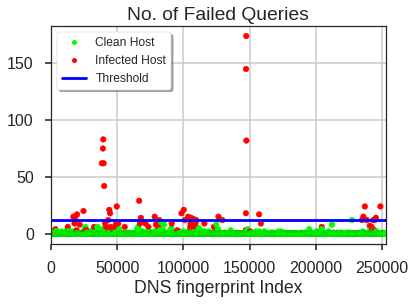

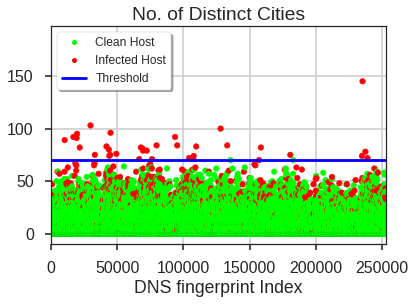

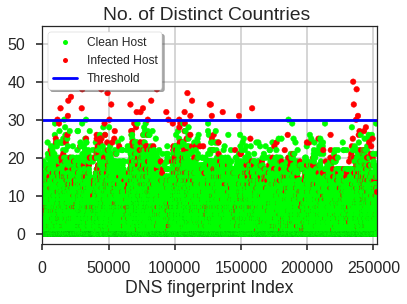

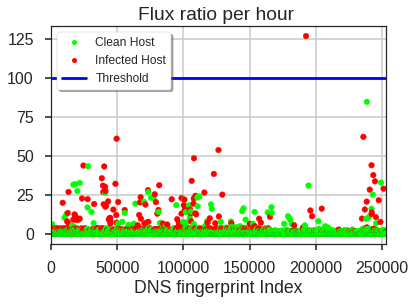

0.9999773906555579
0.9986547617477547
Rank | Feature | Importance
 1. Nbr. of Distinct DNS Servers              (P8) (0.252851)
 2. Flux ratio per hour                      (P15) (0.232253)
 3. Nbr. of DNS requests per hour             (P1) (0.114255)
 4. Nbr. of Distinct TLD  Queried             (P9) (0.106292)
 5. Nbr. of Distinct DNS requests             (P2) (0.076914)
 6. Highest Nbr. of requests(single domain)   (P3) (0.068819)
 7. Uniqueness ratio                         (P11) (0.041702)
 8. Nbr. of Distinct SLD  Queried            (P10) (0.033586)
 9. Nbr. of Distinct Cities                  (P13) (0.030138)
10. Nbr. of Distinct Countries               (P14) (0.017357)
11. Nbr. of PTR Record Queries                (P7) (0.008403)
12. Highest Nbr. of requests                  (P5) (0.006382)
13. Nbr. of Failed Queries                   (P12) (0.005466)
14. Nbr. of MX Record Queries                 (P6) (0.005447)
15. Average Nbr. of requests                  (P4) (0.000136)


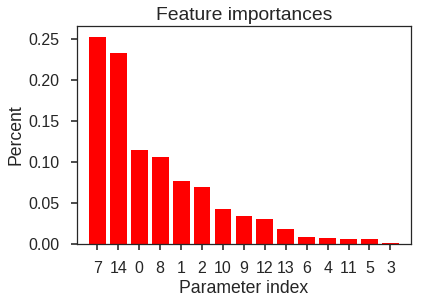

Sensitivity:  0.9992573388425289
Specificity:  0.973371104815864
Accuracy:  0.9986547617477547
Accuracy:  0.9986547617477547
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

Best Score:  0.9986999626945817
Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] max_features=1 ..................................................
[CV] max_features=1 ..................................................
[CV] ................................... max_features=1, total=   2.4s
[CV] max_features=1 ..................................................
[CV] ................................... max_features=1, total=   2.4s
[CV] max_features=2 ....

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.2min


[CV] .................................. max_features=13, total=  12.7s
[CV] max_features=14 .................................................
[CV] .................................. max_features=13, total=  14.3s
[CV] max_features=14 .................................................
[CV] .................................. max_features=14, total=  12.5s
[CV] max_features=14 .................................................
[CV] .................................. max_features=14, total=  14.5s
[CV] max_features=15 .................................................
[CV] .................................. max_features=14, total=  12.2s
[CV] max_features=15 .................................................
[CV] .................................. max_features=15, total=  15.6s
[CV] max_features=15 .................................................
[CV] .................................. max_features=15, total=  14.8s
[CV] .................................. max_features=15, total=  13.2s


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  3.1min finished


Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] n_estimators=1 ..................................................
[CV] n_estimators=1 ..................................................
[CV] ................................... n_estimators=1, total=   0.4s
[CV] n_estimators=1 ..................................................
[CV] ................................... n_estimators=1, total=   0.6s
[CV] n_estimators=3 ..................................................
[CV] ................................... n_estimators=1, total=   0.4s
[CV] n_estimators=3 ..................................................
[CV] ................................... n_estimators=3, total=   1.1s
[CV] n_estimators=3 ..................................................
[CV] ................................... n_estimators=3, total=   1.3s
[CV] n_estimators=5 ..................................................
[CV] ................................... n_estimators=3, total=   1.2s
[CV] n_estimators

[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:   32.9s finished


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] max_depth=2 .....................................................
[CV] max_depth=2 .....................................................
[CV] ...................................... max_depth=2, total=   0.9s
[CV] max_depth=2 .....................................................
[CV] ...................................... max_depth=2, total=   0.9s
[CV] max_depth=3 .....................................................
[CV] ...................................... max_depth=2, total=   1.0s
[CV] max_depth=3 .....................................................
[CV] ...................................... max_depth=3, total=   1.2s
[CV] max_depth=3 .....................................................
[CV] ...................................... max_depth=3, total=   1.3s
[CV] max_depth=5 .....................................................
[CV] ...................................... max_depth=3, total=   1.2s
[CV] max_depth=5 

[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   35.3s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] criterion=gini ..................................................
[CV] criterion=gini ..................................................
[CV] ................................... criterion=gini, total=   4.0s
[CV] criterion=gini ..................................................
[CV] ................................... criterion=gini, total=   4.1s
[CV] criterion=entropy ...............................................
[CV] ................................ criterion=entropy, total=   2.9s
[CV] criterion=entropy ...............................................
[CV] ................................... criterion=gini, total=   4.1s
[CV] criterion=entropy ...............................................
[CV] ................................ criterion=entropy, total=   3.1s
[CV] ................................ criterion=entropy, total=   2.8s


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   11.6s finished


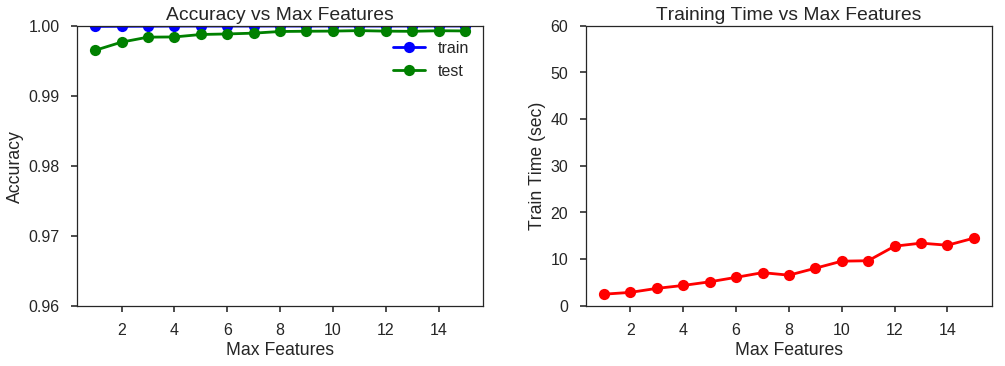

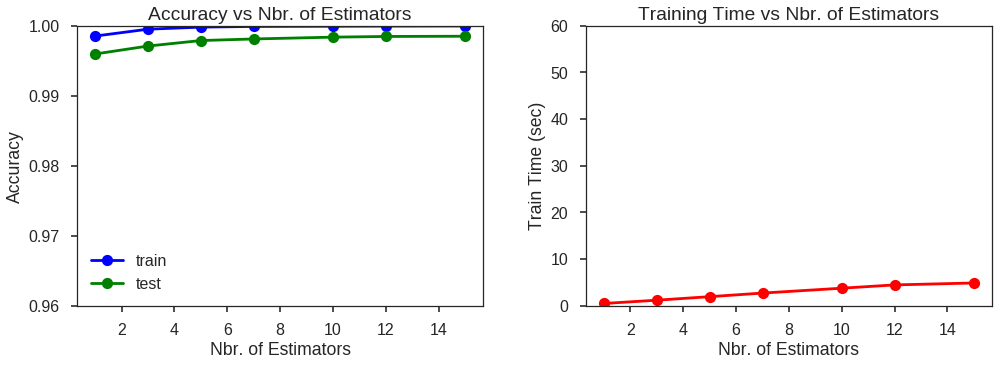

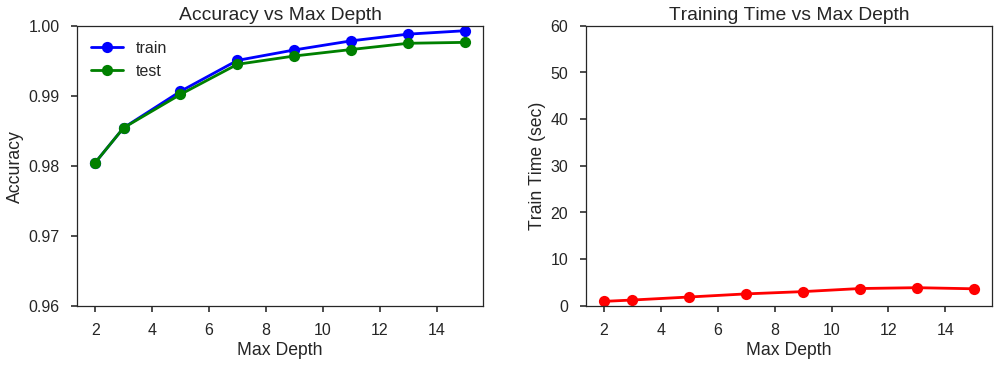

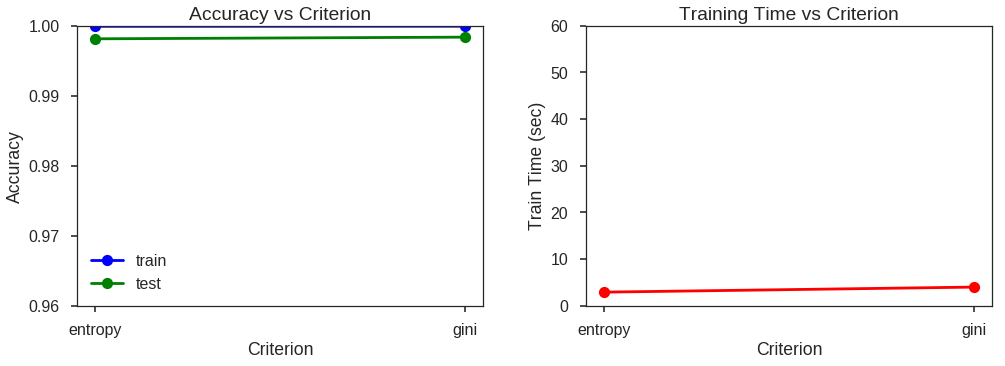

In [2]:
obj = BotDAD()
obj.import_db()
obj.encode_values()
obj.display_count()
obj.split_data()

obj.feature_plot()

obj.create_forest()
obj.show_feature_imp()
obj.plot_baseline()
obj.plot_predicted_model()



obj.plot_grid_search()

obj.plot_GS_Acc_vs_Max_Feature()
obj.plot_GS_Acc_vs_estimators()
obj.plot_GS_Acc_vs_depth()

obj.plot_GS_Acc_vs_Criterian()    

